In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spotify-tracks-audio-features.csv")
print(df.shape)


(18750, 14)


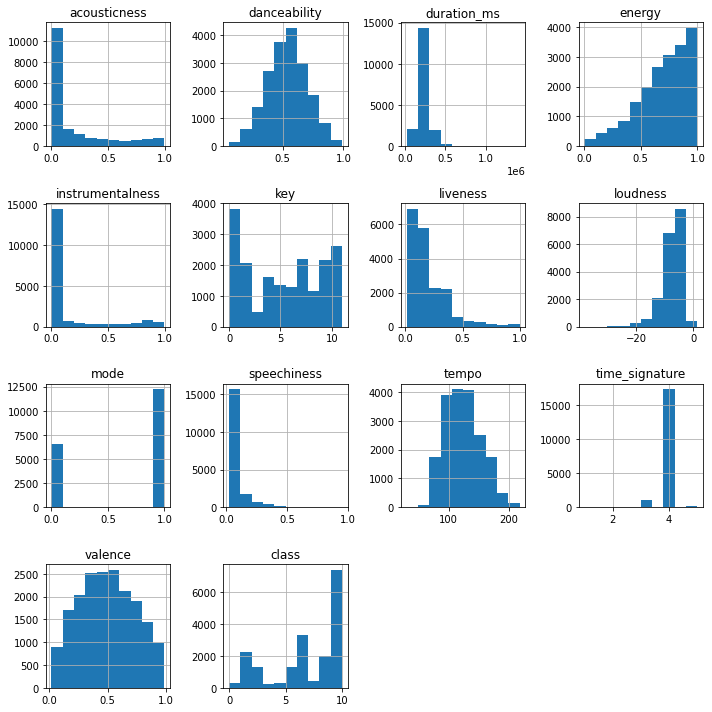

In [45]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.tight_layout()


<AxesSubplot:>

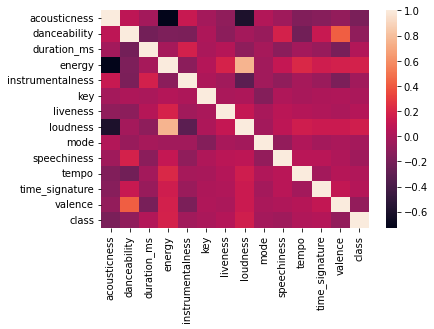

In [46]:
import seaborn as sns

df_corr = df.corr()
sns.heatmap(df_corr)


In [47]:
import numpy as np

dataset = df.values
m, n = dataset.shape
x, y = dataset[:, : n - 1], dataset[:, n - 1]

column_mins = []
column_maxs = []

for i in range(n - 1):
    column_mins.append(min(x[:, i]))
    column_maxs.append(max(x[:, i]))

x_norm = np.zeros((m, n - 1))

for i in range(m):
    for j in range(n - 1):
        xi = x[i, j]
        x_norm[i, j] = (xi - column_mins[j]) / (column_maxs[j] - column_mins[j])

x = x_norm.copy()

classes = []

for yi in y:
    if yi not in classes:
        classes.append(yi)

classes.sort()
classes_len = len(classes)
y_one_hot = np.zeros((m, classes_len))

for i in range(m):
    yi = int(y[i])
    y_one_hot[i, yi] = 1

y = y_one_hot


In [48]:
from sklearn.model_selection import train_test_split

train_percentage = 90
test_size = 1 - (train_percentage / 100)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42
)


In [49]:
features_n = len(x_train[0, :])
classes_n = len(classes)

In [50]:
from keras.models import Sequential
from keras.layers import Dense


def build_model(input_dim: int, output_dim: int):
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(34, activation="sigmoid"))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(output_dim, activation="sigmoid"))
    # model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [51]:
from keras.callbacks import History

model = build_model(features_n, classes_n)
history: History = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
528/528 [==============================] - 1s 1ms/step - loss: 0.3233 - accuracy: 0.2487
Epoch 2/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2685 - accuracy: 0.2871
Epoch 3/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.2871
Epoch 4/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.2871
Epoch 5/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.2871
Epoch 6/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.2871
Epoch 7/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2621 - accuracy: 0.2933
Epoch 8/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2470 - accuracy: 0.3260
Epoch 9/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2395 - accuracy: 0.3396
Epoch 10/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2355 - accura

In [52]:
model.evaluate(x_test, y_test)


59/59 [==============================] - 0s 1ms/step - loss: 0.2196 - accuracy: 0.4171


[0.2195766717195511, 0.41706666350364685]

(0.0, 1.0)

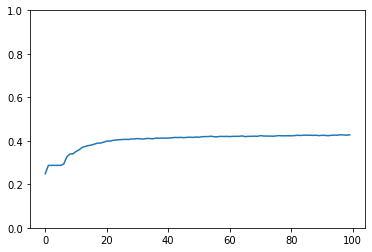

In [53]:
x = history.history["accuracy"]
y = np.arange(len(x))

plt.plot(y, x)
plt.ylim([0, 1])


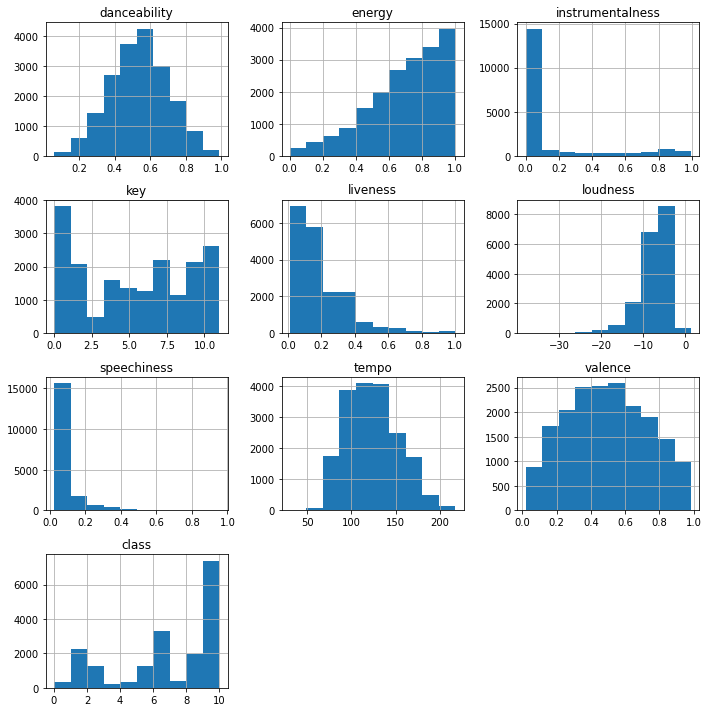

In [54]:
df = df.drop(columns=["time_signature", "mode", "duration_ms", "acousticness"])

df.hist(figsize=(10, 10))
plt.tight_layout()


<AxesSubplot:>

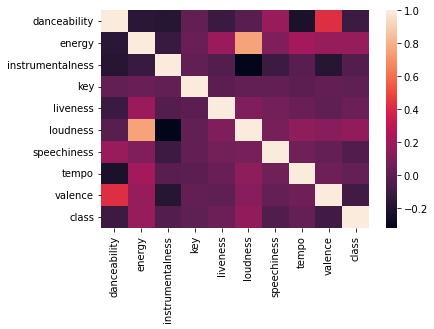

In [55]:
import seaborn as sns

df_corr = df.corr()
sns.heatmap(df_corr)


In [56]:
import numpy as np

dataset = df.values
m, n = dataset.shape
x, y = dataset[:, : n - 1], dataset[:, n - 1]

column_mins = []
column_maxs = []

for i in range(n - 1):
    column_mins.append(min(x[:, i]))
    column_maxs.append(max(x[:, i]))

x_norm = np.zeros((m, n - 1))

for i in range(m):
    for j in range(n - 1):
        xi = x[i, j]
        x_norm[i, j] = (xi - column_mins[j]) / (column_maxs[j] - column_mins[j])

x = x_norm.copy()

classes = []

for yi in y:
    if yi not in classes:
        classes.append(yi)

classes.sort()
classes_len = len(classes)
y_one_hot = np.zeros((m, classes_len))

for i in range(m):
    yi = int(y[i])
    y_one_hot[i, yi] = 1

y = y_one_hot


In [57]:
from sklearn.model_selection import train_test_split

train_percentage = 90
test_size = 1 - (train_percentage / 100)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42
)


In [58]:
features_n = len(x_train[0, :])
classes_n = len(classes)

In [59]:
model = build_model(features_n, classes_n)
history: History = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
528/528 [==============================] - 1s 1ms/step - loss: 0.3590 - accuracy: 0.1761
Epoch 2/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.2871
Epoch 3/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2683 - accuracy: 0.2871
Epoch 4/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.2871
Epoch 5/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.2871
Epoch 6/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.2871
Epoch 7/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2644 - accuracy: 0.2871
Epoch 8/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2529 - accuracy: 0.2990
Epoch 9/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2474 - accuracy: 0.3228
Epoch 10/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2455 - accura

In [60]:
model.evaluate(x_test, y_test)


59/59 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.4123


[0.22471722960472107, 0.41226667165756226]

(0.0, 1.0)

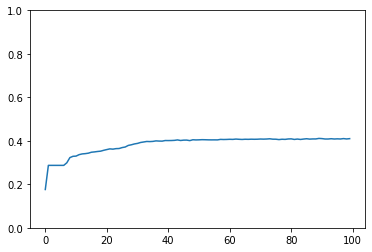

In [61]:
x = history.history["accuracy"]
y = np.arange(len(x))

plt.plot(y, x)
plt.ylim([0, 1])
